In [191]:
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
DIR = './data/'

In [192]:
def get_data(directories,years): 
    return pd.concat(
        map(lambda x: pd.read_csv(
            f'{directories}yob{x}.txt',
            header=None,
            names=['Name','Gender','Quantity']
        ).assign(Year=x),
            years)
    ).reset_index(drop=True)

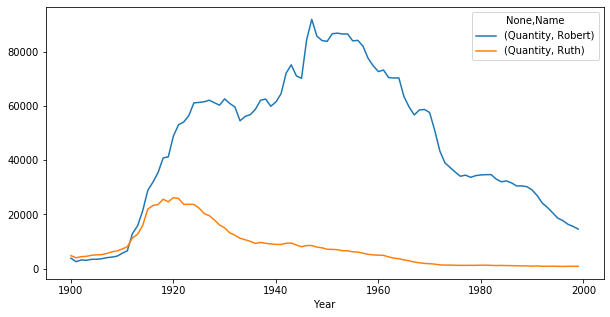

In [193]:
df = get_data(DIR,range(1900,2000))
name_dinamics = df[(df['Name'] == 'Ruth') | (df['Name'] == 'Robert')].groupby(['Name','Year']).sum().unstack('Name')
name_dinamics.plot()

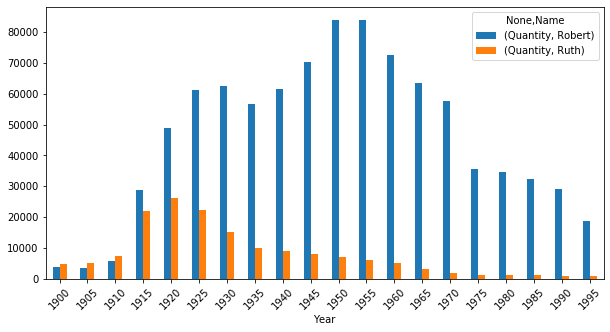

In [194]:
name_dinamics.filter(regex='0$|5$',axis=0).plot(kind='bar', rot=45)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E649323A48>],
      dtype=object)

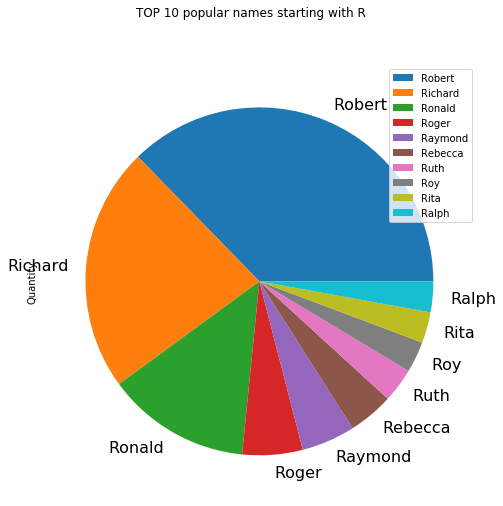

In [200]:
df2 = get_data(DIR,[1950])[['Quantity','Name']].set_index('Name').filter(regex='^R', axis=0).sort_values('Quantity',ascending=None)[:10]
df2.plot(kind='pie',subplots=True, title='TOP 10 popular names starting with R',figsize=(10,8),fontsize=16)